In [293]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [294]:
testperson = 16

In [295]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Christian_16.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.272994,1,1,-104.745613,88.590828,731.256348,-35.975800,92.500648,738.355774,0.706688,...,2.574188,2.691971,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
1,0.282084,1,1,-104.816902,88.560173,731.253845,-36.037792,92.506744,738.361084,0.706829,...,2.575409,2.689346,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
2,0.293450,1,1,-104.867874,88.536102,731.356201,-36.090157,92.507133,738.479126,0.706901,...,2.574066,2.693115,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
3,0.304661,1,1,-104.863083,88.497910,731.333252,-36.094849,92.472176,738.454773,0.706899,...,2.575027,2.686478,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
4,0.315348,1,1,-104.791191,88.441681,731.238708,-36.056553,92.425804,738.377502,0.706786,...,2.574158,2.693619,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
5,0.326318,1,1,-104.709648,88.389931,731.254883,-35.973309,92.390762,738.383057,0.706623,...,2.580063,2.686737,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
6,0.338287,1,1,-104.625320,88.352280,731.281860,-35.865410,92.376640,738.406372,0.706452,...,2.579483,2.687469,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
7,0.349260,1,1,-104.504356,88.325439,731.377625,-35.764610,92.379662,738.479309,0.706190,...,2.581375,2.687546,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
8,0.360228,1,1,-104.389175,88.311302,731.330811,-35.655464,92.386276,738.421875,0.705978,...,2.569214,2.685364,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive
9,0.371199,1,1,-104.352859,88.348984,731.495422,-35.599163,92.444389,738.614502,0.705861,...,2.582169,2.685013,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive


In [296]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(137213, 39)

In [297]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P05_text.txt', 'AI_HC_P05_MCQ.txt', 'AI_HC_P05_FIBQ.txt',
       'OR_HC_P05_text.txt', 'OR_HC_P05_MCQ.txt', 'OR_HC_P05_FIBQ.txt',
       'AI_SK_P05_text.txt', 'AI_SK_P05_MCQ.txt', 'AI_SK_P05_FIBQ.txt',
       'OR_SK_P05_text.txt', 'OR_SK_P05_MCQ.txt', 'OR_SK_P05_FIBQ.txt',
       'AI_KB_P05_text.txt', 'AI_KB_P05_MCQ.txt', 'AI_KB_P05_FIBQ.txt',
       'OR_KB_P05_text.txt', 'OR_KB_P05_MCQ.txt', 'OR_KB_P05_FIBQ.txt'],
      dtype=object)

In [298]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-60.501591,100.421417,702.337402,8.894744,108.440697,706.043396,0.624758,...,3.125198,3.083328,True,OR_SK_P05_text.txt,5.0,16.0,Times New Roman,SK,False,Immersive
1,0.011016,1,1,-60.537113,100.444214,702.401001,8.872938,108.499825,706.130493,0.624818,...,3.117615,3.081238,True,OR_SK_P05_text.txt,5.0,16.0,Times New Roman,SK,False,Immersive
2,0.021903,1,1,-60.603230,100.456886,702.473633,8.848333,108.538322,706.214111,0.624940,...,3.116165,3.081802,True,OR_SK_P05_text.txt,5.0,16.0,Times New Roman,SK,False,Immersive
3,0.032829,1,1,-60.650345,100.468170,702.505981,8.826255,108.562897,706.244873,0.625030,...,3.112518,3.077515,True,OR_SK_P05_text.txt,5.0,16.0,Times New Roman,SK,False,Immersive
4,0.044065,1,1,-60.685665,100.461044,702.446350,8.797324,108.559784,706.181946,0.625112,...,3.115143,3.078308,True,OR_SK_P05_text.txt,5.0,16.0,Times New Roman,SK,False,Immersive


In [299]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,858.597565,829.057999,326.014502,350.361729
1,0.011016,854.645081,822.318420,335.023077,347.860773
2,0.021903,852.871933,834.650345,336.126258,343.250763
3,0.032829,852.500076,830.967102,343.754740,339.882832
4,0.044065,851.931686,834.166489,333.335645,341.750937
...,...,...,...,...,...
10717,135.655462,1063.193130,1065.538788,473.259816,453.611240
10718,135.666669,1066.303787,1068.649902,471.666069,446.370349
10719,135.678055,1071.208801,1082.511292,461.430030,448.891711
10720,135.689009,1140.845566,1149.769592,463.660727,441.787376


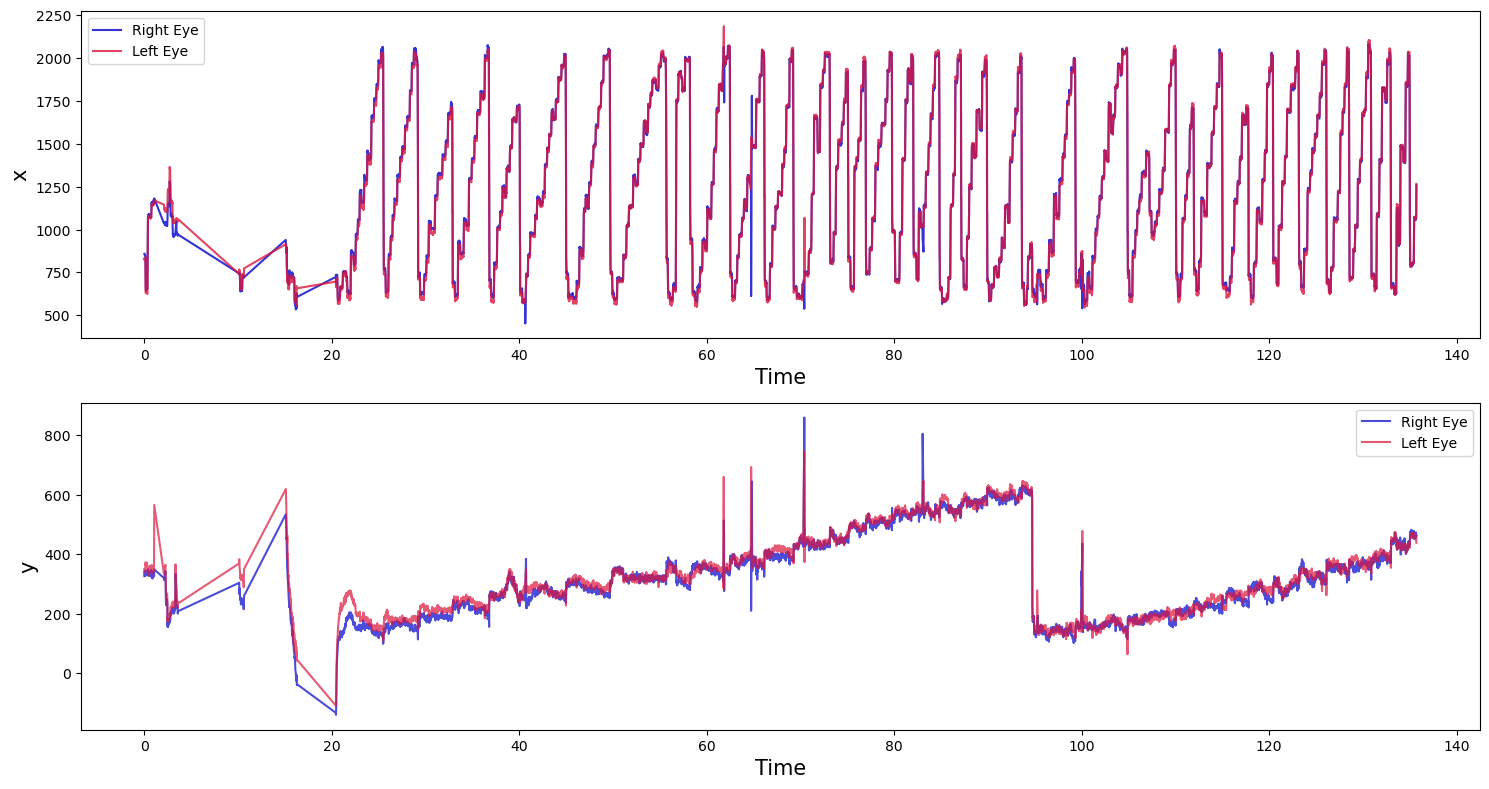

In [300]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [301]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [302]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [303]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [304]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,551.214104,544.708862,153.272356,237.843382
1,0.011155,556.257439,544.708862,150.718957,237.843382
2,0.023042,551.949387,539.598351,157.722495,234.806156
3,0.034012,550.408401,549.201660,162.534903,250.015655
4,0.045675,557.001114,549.201660,168.499600,250.015655
5,0.056299,554.776955,550.108337,177.644581,252.679560
6,0.066713,558.335648,557.098465,187.723131,255.688462
7,0.078280,551.723824,557.098465,189.177876,255.688462
8,0.089318,566.912727,567.040558,176.387161,254.888177
9,0.100213,576.799889,566.673660,147.993060,219.075902


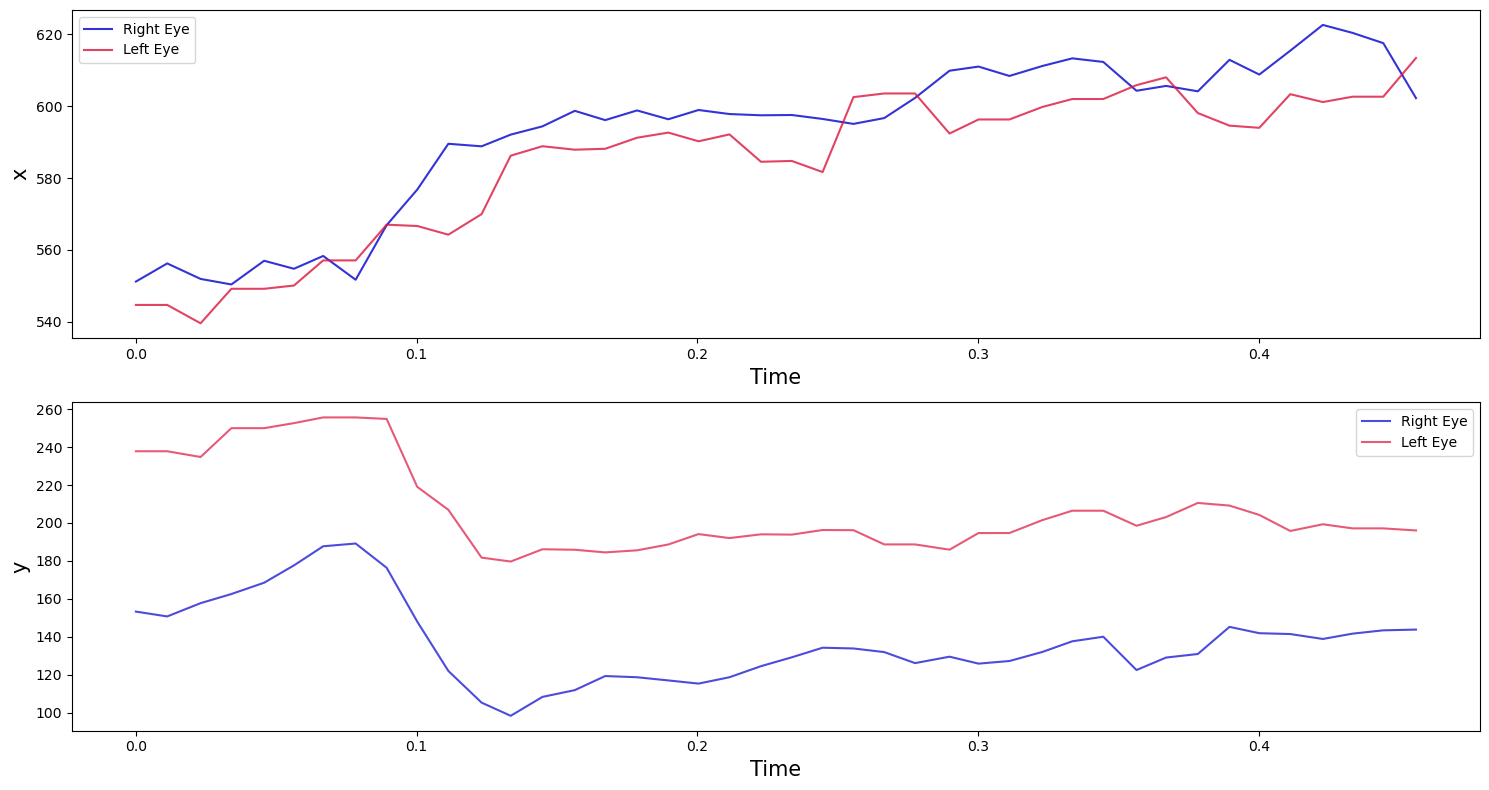

In [305]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


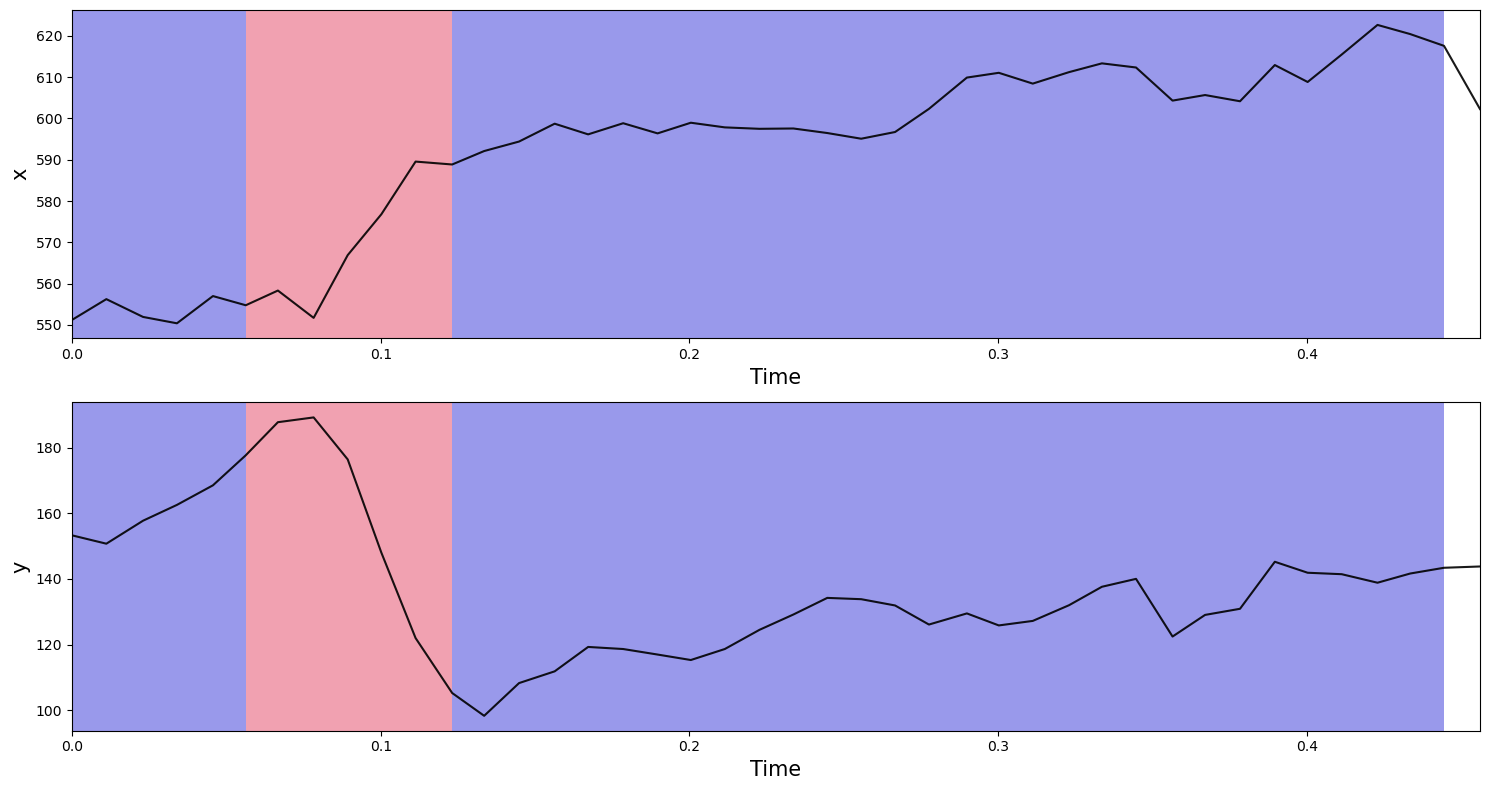

In [306]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [307]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [308]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-27.784191,122.349411,626.670837,36.984341,135.188858,628.219788,0.564202,...,3.529892,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,1
1,0.011164,1,1,-27.784191,122.349411,626.670837,37.410774,135.172653,628.472778,0.564202,...,3.533569,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,1
2,0.022566,1,1,-27.524799,122.511192,627.088989,37.696056,135.175674,628.778931,0.563568,...,3.529388,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,1
3,0.033495,1,1,-27.063404,122.754601,627.684753,38.295399,135.125961,629.314819,0.562456,...,3.536880,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,1
4,0.044629,1,1,-27.063404,122.754601,627.684753,38.664612,135.160339,629.980164,0.562456,...,3.528351,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2.387959,1,1,-59.151318,114.740921,633.224670,7.679081,129.992188,639.160400,0.634483,...,3.514572,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,1
211,2.398958,1,1,-59.316280,114.722168,633.292847,7.617808,129.760391,639.201233,0.634841,...,3.514008,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,1
212,2.409419,1,1,-59.316280,114.722168,633.292847,7.551341,129.632874,639.210754,0.634841,...,3.505905,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,0
213,2.421160,1,1,-59.602627,114.742012,633.321045,7.369419,129.543732,639.222595,0.635480,...,3.515869,True,OR_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Skimming,0


In [309]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [310]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-104.745613,88.590828,731.256348,-35.975800,92.500648,738.355774,0.706688,...,2.691971,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
1,0.009090,1,1,-104.816902,88.560173,731.253845,-36.037792,92.506744,738.361084,0.706829,...,2.689346,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
2,0.020456,1,1,-104.867874,88.536102,731.356201,-36.090157,92.507133,738.479126,0.706901,...,2.693115,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
3,0.031667,1,1,-104.863083,88.497910,731.333252,-36.094849,92.472176,738.454773,0.706899,...,2.686478,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
4,0.042354,1,1,-104.791191,88.441681,731.238708,-36.056553,92.425804,738.377502,0.706786,...,2.693619,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,78.903286,1,1,-56.032200,119.686981,679.131531,15.155400,108.511681,680.110107,0.618997,...,2.836578,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
6115,78.914032,1,1,-55.365189,119.189575,678.532898,15.648593,107.984917,679.453430,0.617707,...,2.836411,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
6116,78.924532,1,1,-54.901436,118.832733,678.084229,16.127123,107.480621,678.789246,0.616815,...,2.837250,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1
6117,78.936059,1,1,-54.504154,118.524254,677.771667,16.565266,107.046738,678.281738,0.616038,...,2.841064,True,AI_HC_P05_text.txt,5.0,16.0,Times New Roman,HC,False,Immersive,1


In [311]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [312]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [313]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")